# Introduction to Probabilisitic Methods Exercises

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


These are exercises for practice, not to be submitted.

## Exercise 1 ## 

Design and code a probabilistic method to estimate $\pi\sim 3.14$.

Estimated value of π using 100000 points: 3.14184


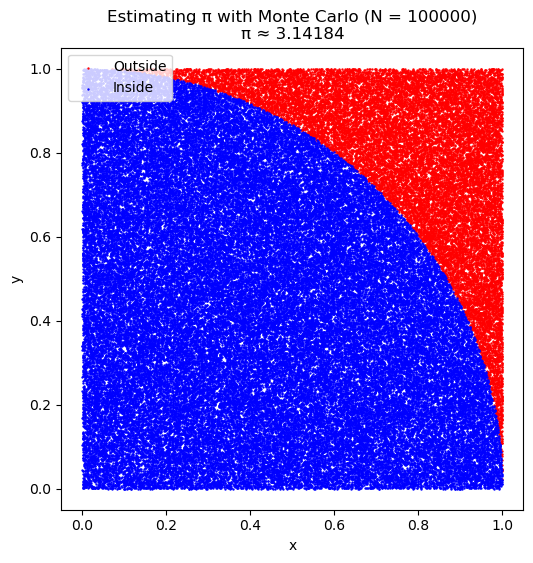

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of random points
N = 100000

# Generate random (x, y) points in the unit square
x = np.random.rand(N)
y = np.random.rand(N)

# Count how many points fall inside the quarter circle
inside_circle = x**2 + y**2 <= 1.0
pi_estimate = 4 * np.sum(inside_circle) / N

print(f"Estimated value of π using {N} points: {pi_estimate:.5f}")

# Optional: visualize
plt.figure(figsize=(6, 6))
plt.scatter(x[~inside_circle], y[~inside_circle], s=0.5, color='red', label='Outside')
plt.scatter(x[inside_circle], y[inside_circle], s=0.5, color='blue', label='Inside')
plt.title(f'Estimating π with Monte Carlo (N = {N})\nπ ≈ {pi_estimate:.5f}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.legend()
plt.show()

## Exercise 2 ## 

###  Rules of Craps (Vegas Casino Style)

 
The basic rules are outlined below and a several common betting options are given.

### 1. The Come-Out Roll
 - The game begins with the shooter making a "come-out" roll using two six-sided dice.
 - If the come-out roll is a **7 or 11**, the pass line bet wins (called a "natural").
 - If the come-out roll is **2, 3, or 12**, the pass line bet loses (called "craps").
 - If the come-out roll is **4, 5, 6, 8, 9, or 10**, that number becomes the **point**.

### 2. Point Phase
 - Once the point is established, the shooter continues rolling.
 - The goal is to roll the **point number again before rolling a 7**.
     - If the shooter rolls the point again, pass line bets win.
     - If the shooter rolls a **7 before the point**, pass line bets lose (called "seven out").

### 3. Some Betting Options
 - **Pass Line Bet**: Wins on a natural (7 or 11), loses on craps (2, 3, 12), wins if point is hit before a 7.
 - **Don't Pass Bet**: Opposite of pass line. Wins on craps (2, 3), ties on 12, loses on 7 or 11.

 
 
 ### Part 1
 Determine the odds of winning at craps for the Pass Line Bet and Don't Pass Bet.
 
 ### Part 2
 Use probabilistic/Monte-Carlo methods for estimating the odds of winning the Pass Line and Don't Pass Line Bets.

## Exercise 2 – Part 1

### Odds of Winning at Craps

We calculate the probability of winning for both the **Pass Line Bet** and the **Don't Pass Bet** according to the official rules of Craps.

---

### Pass Line Bet

**Come-Out Roll:**

- Win immediately on a 7 or 11:  
  
  $P(\text{win}) = \frac{6}{36} + \frac{2}{36} = \frac{8}{36}$
  

- Lose immediately on a 2, 3, or 12:  
  
  $P(\text{lose}) = \frac{1 + 2 + 1}{36} = \frac{4}{36}$
  

- Otherwise, establish a point (4, 5, 6, 8, 9, 10) and continue rolling.

**Point Phase:**

The shooter must roll the point again before a 7.

| Point | P(establish) | P(win given point) |
|-------|---------------|---------------------|
| 4     | 3/36          | 1/3                |
| 5     | 4/36          | 2/5                |
| 6     | 5/36          | 5/11               |
| 8     | 5/36          | 5/11               |
| 9     | 4/36          | 2/5                |
| 10    | 3/36          | 1/3                |

\[
$P(\text{win after point}) = 
\frac{3}{36} \cdot \frac{1}{3} +
\frac{4}{36} \cdot \frac{2}{5} +
\frac{5}{36} \cdot \frac{5}{11} +
\frac{5}{36} \cdot \frac{5}{11} +
\frac{4}{36} \cdot \frac{2}{5} +
\frac{3}{36} \cdot \frac{1}{3}
\approx 0.222$
\]

**Total Win Probability:**

\[
$P(\text{Pass Line win}) = \frac{8}{36} + 0.222 \approx \boxed{0.492}$
\]

---

### Don't Pass Bet

**Come-Out Roll:**

- Win on 2 or 3:
  \[
  $P(\text{win}) = \frac{1 + 2}{36} = \frac{3}{36}$
  \]

- Tie (push) on 12:
  \[
  $P(\text{tie}) = \frac{1}{36}$
  \]

- Lose on 7 or 11:
  \[
  $P(\text{lose}) = \frac{6 + 2}{36} = \frac{8}{36}$
  \]

**Point Phase:**

The shooter must roll a 7 before the point.

| Point | P(establish) | P(win given point) |
|-------|---------------|---------------------|
| 4     | 3/36          | 2/3                |
| 5     | 4/36          | 3/5                |
| 6     | 5/36          | 6/11               |
| 8     | 5/36          | 6/11               |
| 9     | 4/36          | 3/5                |
| 10    | 3/36          | 2/3                |

\[
$P(\text{Don't Pass win after point}) =
\frac{3}{36} \cdot \frac{2}{3} +
\frac{4}{36} \cdot \frac{3}{5} +
\frac{5}{36} \cdot \frac{6}{11} +
\frac{5}{36} \cdot \frac{6}{11} +
\frac{4}{36} \cdot \frac{3}{5} +
\frac{3}{36} \cdot \frac{2}{3}
\approx 0.265$
\]

**Total Win Probability (excluding ties):**

\[
$P(\text{Don't Pass win}) = \frac{3}{36} + 0.265 \approx \boxed{0.482}$
\]

In [3]:
import numpy as np

def roll_dice():
    """Simulates rolling two six-sided dice."""
    return np.random.randint(1, 7) + np.random.randint(1, 7)

def simulate_craps(rounds=1_000_000):
    pass_line_wins = 0
    dont_pass_wins = 0
    dont_pass_ties = 0

    for _ in range(rounds):
        come_out = roll_dice()

        # --- Pass Line ---
        if come_out in [7, 11]:
            pass_line_wins += 1
        elif come_out in [2, 3]:
            dont_pass_wins += 1
        elif come_out == 12:
            dont_pass_ties += 1  # Tie on Don't Pass
        elif come_out in [4, 5, 6, 8, 9, 10]:
            point = come_out
            while True:
                roll = roll_dice()
                if roll == point:
                    pass_line_wins += 1
                    break
                elif roll == 7:
                    dont_pass_wins += 1
                    break

    # Compute win rates
    pass_line_rate = pass_line_wins / rounds
    dont_pass_rate = dont_pass_wins / (rounds - dont_pass_ties)

    return pass_line_rate, dont_pass_rate

# Run simulation
pass_win, dont_pass_win = simulate_craps()

print(f"Estimated Pass Line Win Rate     : {pass_win:.4f}")
print(f"Estimated Don't Pass Line Win Rate (excluding ties): {dont_pass_win:.4f}")

Estimated Pass Line Win Rate     : 0.4934
Estimated Don't Pass Line Win Rate (excluding ties): 0.4925


## Exercise 3 ##

Ten cards labeled 1 through 10 are shuffled. What is the probability that one of the ten cards was shuffled to its original location?

Find the true expectation and try using a probabilistic method to estimate the answer.

## Exercise 3 – Part 1: Theoretical Expectation

### Problem

Ten cards labeled 1 through 10 are shuffled randomly.

**What is the probability that at least one of the ten cards remains in its original position?**

This is a classic probability problem involving **fixed points** in a permutation, also known as the **matching problem** or **derangement problem**.

---

### 🧠 Derivation

Let \( $A_n$ \) be the event that **at least one card remains in its original position** in a random shuffle of \( $n$ \) cards.

Let \( $D_n$ \) be the number of **derangements** of \( $n$ \) items — permutations where **no element is in its original position**.

Then:

\[
$P(\text{at least one fixed point}) = 1 - \frac{D_n}{n!}$
\]

The number of derangements is given by:

\[
$D_n = n! \sum_{k=0}^{n} \frac{(-1)^k}{k!}$
\]

So for \( $n = 10$ \):

\[
$P(\text{at least one fixed point}) = 1 - \frac{D_{10}}{10!} 
= 1 - \sum_{k=0}^{10} \frac{(-1)^k}{k!}
\approx 1 - \frac{1}{e} \approx \boxed{0.6321}$
\]

---

### ✅ Conclusion

The probability that **at least one card** remains in its original position after shuffling **10 cards** is approximately:

\[
$\boxed{63.2\%}$
\]

This result converges to \( $1 - \frac{1}{e}$ \) as \( $n \to \infty$ \).

In [6]:
import numpy as np

def simulate_fixed_point_probability(n=10, trials=1_000_000):
    success = 0

    for _ in range(trials):
        original = list(range(1, n+1))
        shuffled = np.random.permutation(original)
        if any(shuffled[i] == original[i] for i in range(n)):
            success += 1

    estimated_prob = success / trials
    return estimated_prob

# Run simulation
estimated = simulate_fixed_point_probability()
print(f"Estimated probability of at least one fixed point: {estimated:.4f}")


Estimated probability of at least one fixed point: 0.6317


## Exercise 4

You approach two slot machines. Each machine costs $\$.050$ to play and pays out $\$1$ for a win. You do not know the exact probability of winning on either machine, but you are told that **one has a 2/5 chance of winning**, and the **other has a 3/5 chance of winning**. You do not know which machine has which probability.

Your goal is to use probabilistic methods to compare two strategies over a total of 100 plays, to see which strategy is more profitable on average. A more profitable strategy is one that tends to allocate more plays to the machine with the higher payout probability.

### Strategies to Simulate

1. **Loss-Switch Strategy:**  
   Select a slot machine at random. Play on that machine until you lose, then switch to the other machine. Repeat this process for 100 plays.

2. **Exploration-Exploitation Strategy:**  
   Start by playing each machine 10 times. Estimate the win rate for each machine based on these initial plays. Then:
   - Continue playing the machine with the higher observed win rate.
   - After each play, update the estimated win rate.
   - If the other machine’s estimated win rate becomes higher, switch to it.
   - Repeat until 100 total plays have been made.

---

**Note:**  
While this is a simplified, hypothetical scenario, it mirrors real-world decision-making under uncertainty. For instance, in finance, a trader might have multiple strategies available for a given asset. The decision of which strategy to follow at a given time can be based on adaptive rules informed by past performance, similar in spirit to the strategies explored here.